In [66]:
#### Steps for Part 1 of the analysis:
###### 1- Import the Pandas and Matplotlib libraries
###### 2- Create the yearly_df data frame from the csv file for yearly_deaths_by_clinic.csv
###### 3- Explore the shape and information about the dataframe

#### Steps for Part 2 of the analysis:
###### 1- Create the monthly_df data frame from the csv file for monthly_deaths.csv
###### 2- Explore the monthly_df data frame
###### 2- Investigate the number of deaths from 1841 to 1846

In [67]:
### Part I - Analysis of Yearly Data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

#Create the yearly_df dataframe from the csv file
yearly_df = pd.read_csv("data\yearly_deaths_by_clinic.csv")

yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [69]:
yearly_df.shape

(12, 4)

In [70]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


#### Use the groupby function to split the data from the dataframe by the number of deaths in the 2 clinics for the years 1841-1846

In [71]:
yearly_df.groupby("clinic") ["deaths"].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

#### The number of deaths in Clinic 1 (1989) significantly exceeds the deaths in Clinic 2 (691)

#### We will now add a new column called 'Death Ratio' to the dataframe that calculates the ratio of deaths to births

In [72]:
yearly_df["Death Ratio"] = yearly_df["deaths"] / yearly_df["births"]
yearly_df

,year,births,deaths,clinic,Death Ratio
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


#### Let's create 2 dataframes - one for each clinic - i.e clinic_1 and clinic_2

In [73]:

clinic_1 = yearly_df[yearly_df["clinic"] == "clinic 1"]
clinic_2 = yearly_df[yearly_df["clinic"] == "clinic 2"]


In [74]:
clinic_1

,year,births,deaths,clinic,Death Ratio
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [75]:
clinic_2

,year,births,deaths,clinic,Death Ratio
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


#### We will now plot a histogram of the number of deaths in clinic 1 using Matplotlib

Text(0, 0.5, 'Number of Deaths')

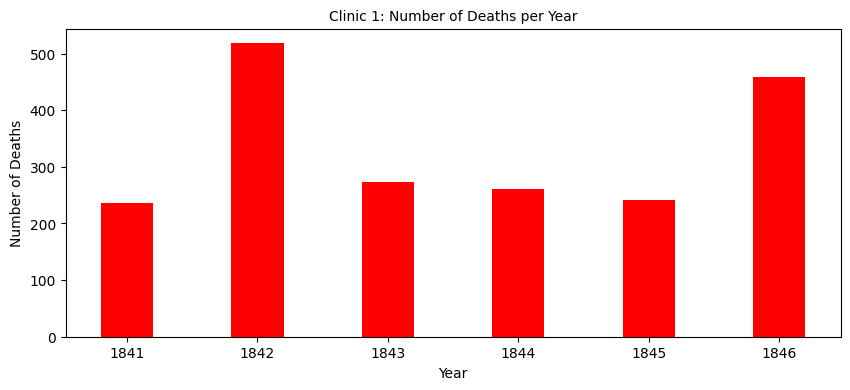

In [76]:
fig, ax = plt.subplots(figsize = (10,4))
plt.bar(clinic_1.year, clinic_1.deaths, width= 0.4, color= "red")
plt.title("Clinic 1: Number of Deaths per Year", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Number of Deaths", fontsize=10)

#### We will now plot a histogram of the number of deaths in clinic 2

Text(0, 0.5, 'Number of Deaths')

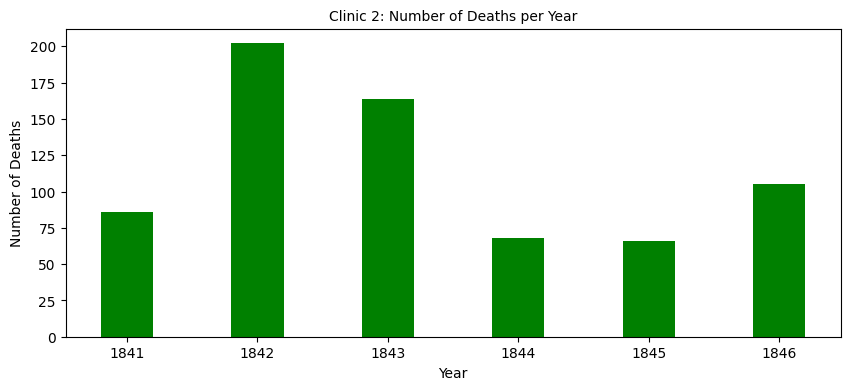

In [77]:
fig, ax = plt.subplots(figsize = (10,4))
plt.bar(clinic_2.year, clinic_2.deaths, width= 0.4, color= "green")
plt.title("Clinic 2: Number of Deaths per Year", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Number of Deaths", fontsize=10)

#### 1842 had the highets number of deaths - 518 in Clinic 1 and 202 in Clinic 2

#### Now that we have a death ratio (ratio of deaths/births for both clinics) - let's plot it to visualize the difference in the 2 clinics

<Axes: xlabel='year', ylabel='Proportion of Deaths'>

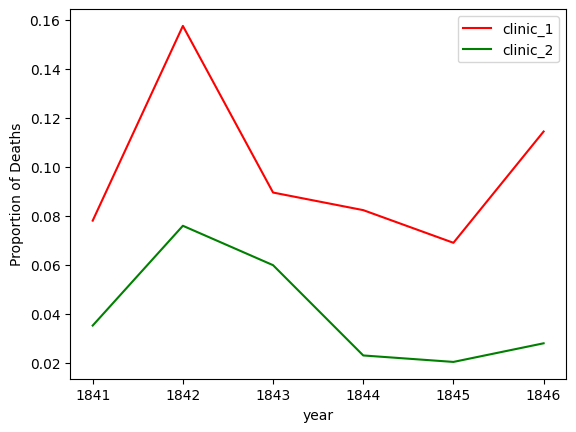

In [78]:
ax = clinic_1.plot(x= "year", y= "Death Ratio", label= "clinic_1", color="red")
clinic_2.plot(x= "year", y= "Death Ratio", label= "clinic_2", ax=ax, ylabel= "Proportion of Deaths", color="green")

#### Clinic 1 has significantly higher death ratio. As described in the readme.md, a number of the nurses in Clinic 1 were working on postmortem of corpses in the autopsy room and then returned to Clinic 1 to work on patients without washing their hands.

### Part 2 - Analysis of monthly data

In [80]:
# Create monthly_df dataframe
monthly_df = pd.read_csv("data\monthly_deaths.csv")
monthly_df.head(5)

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [81]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [82]:
#Calculate the death ratio per month
monthly_df["Death Ratio"]= monthly_df["deaths"] / monthly_df["births"]
monthly_df.head(5)

,date,births,deaths,Death Ratio
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


#### In the summer of 1847, the doctors and nurses were ordered to wash their hands. The monthly dataframe will reveal the effect of this change in behavior. 

In [83]:
# Convert the date from a string to a Pandas datetime object for better analysis of the summer-time (June) change to hand-washing
monthly_df.dtypes
monthly_df['date'] =  pd.to_datetime(monthly_df['date'])

In [84]:
# Identify and label the date on which hand-washing started as "start_handwashing"
start_handwashing = pd.to_datetime('1847-06-01')

# Now let's create 2 dataframes - one for data before start_handwashing and the other for data after start_handwashing
before_washing = monthly_df[monthly_df["date"] < start_handwashing]
after_washing = monthly_df[monthly_df["date"] >= start_handwashing]

### Let's visualize the death ratio before the start of hand-washing

Text(0, 0.5, 'Proportion of Deaths')

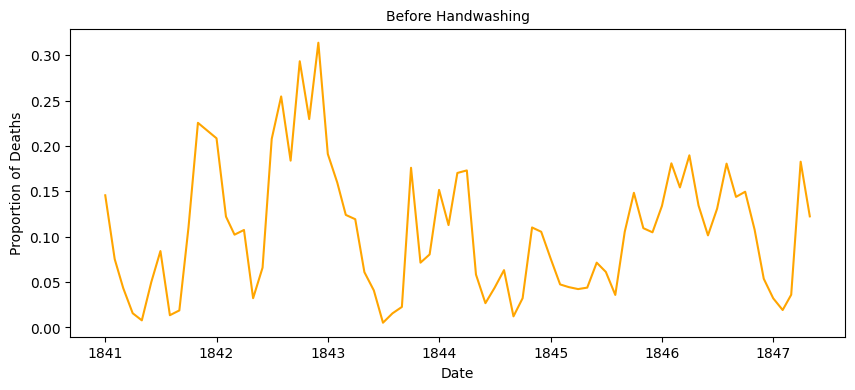

In [85]:
fig,ax = plt.subplots(figsize = (10,4))
x= before_washing["date"]
y= before_washing["Death Ratio"]
plt.plot(x, y, color= "orange")
plt.title("Before Handwashing", fontsize=10)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Proportion of Deaths", fontsize=10)

### Now let's compare it with a visualization of death ratio after the start of hand-washing

Text(0, 0.5, 'Proportion of Deaths')

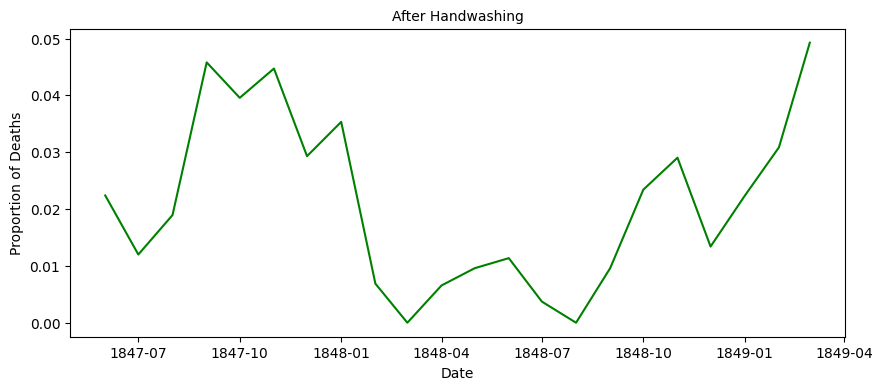

In [86]:
fig,ax = plt.subplots(figsize = (10,4))
x= after_washing["date"]
y= after_washing["Death Ratio"]
plt.plot(x, y, color= "green")
plt.title("After Handwashing", fontsize=10)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Proportion of Deaths", fontsize=10)

#### To evaluate the difference between the before and after hand-washing let's plot the 2 dataframes on a single chart

<Axes: xlabel='date', ylabel='Death Ratio'>

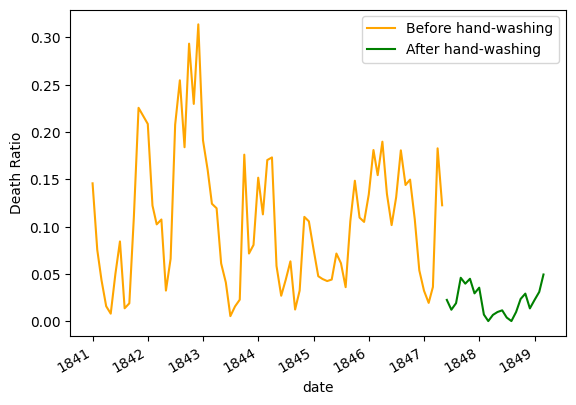

In [87]:
ax= before_washing.plot(x= "date", y= "Death Ratio", label= "Before hand-washing", color="orange")
after_washing.plot(x= "date", y= "Death Ratio", label= "After hand-washing", ax=ax, ylabel= "Death Ratio", color="green") 

#### The stark difference in patient outcomes before and after hand-washing is noticeable in the chart

#### Now let's get a quantitative idea of the improvement in patient outcomes

In [88]:
before_proportion = before_washing["Death Ratio"]
after_proportion = after_washing["Death Ratio"]
before_proportion.mean()

0.10504998260908789

In [89]:
after_proportion.mean()

0.021093375097254535

#### The difference between the two means will tell us the extent of improvement in the ratio deaths to births

In [90]:

improvement = after_proportion.mean() - before_proportion.mean()
improvement

-0.08395660751183336

#### The negative value indicates a decrease in the ratio of deaths to births. From about 10% of deaths it went down to about 2% of deaths after the advent of hand-washing.